<a href="https://colab.research.google.com/github/MissMercyKN/AI-Tools/blob/main/amazonreviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arvinemoraa","key":"d02d3fed4197c8d193b3c7ae7f0dd62e"}'}

In [ ]:
# Install Kaggle
!pip install -q kaggle

# Make a directory for Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Amazon Reviews dataset
!kaggle datasets download -d bittlingmayer/amazonreviews

# Unzip
!unzip -q amazonreviews.zip -d amazon_reviews


Dataset URL: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews
License(s): unknown
 96% 474M/493M [00:01<00:00, 366MB/s]
100% 493M/493M [00:01<00:00, 453MB/s]


In [14]:
import os
# Corrected directory name to match the unzip command
print(os.listdir('amazon_reviews'))
# Expect a CSV like: reviews.csv, or similar

['train.ft.txt.bz2', 'test.ft.txt.bz2']


In [ ]:
# -----------------------
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install vaderSentiment
# Install cupy to potentially resolve the cublas import error
!pip install cupy-cuda11x # or cupy depending on your CUDA version

import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import files

# Load spaCy model (swap with "en_core_web_trf" for higher accuracy)
nlp = spacy.load("en_core_web_sm")

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
import pandas as pd
import os # Import os again for clarity within this cell

# Adjust filename as needed based on the output of the previous cell
# Assuming the output of os.listdir('amazon_reviews') contains the file
# Replace 'test.ft.txt.bz2' with the actual filename from the output if different
# Corrected the directory name from 'amazon_data' to 'amazon_reviews'
file_list = os.listdir('amazon_reviews')
if file_list:
    # Assuming we want to read 'test.ft.txt.bz2' or the first file if it's different
    # You might need to inspect the output of os.listdir('amazon_reviews') to confirm the exact filename
    # A common filename for this dataset structure is 'test.ft.txt.bz2' or 'train.ft.txt.bz2'
    csv_filename = 'test.ft.txt.bz2' # Or file_list[0] if the first file is the target
    # Check if the assumed filename exists in the file list, otherwise use the first file
    if csv_filename not in file_list:
        print(f"Warning: '{csv_filename}' not found in 'amazon_reviews'. Using the first file found: '{file_list[0]}'")
        csv_filename = file_list[0]

    filepath = f"amazon_reviews/{csv_filename}" # Corrected the directory name

    # Import ParserError explicitly from pandas.errors for the except block
    from pandas.errors import ParserError

    try:
        # Attempt to read the file assuming a space delimiter and two columns (label and text)
        # and handling potential quoting issues.
        # Using `engine='python'` can sometimes be more robust for tricky formats
        # but might be slower for large files. Let's try the C engine first.
        df = pd.read_csv(filepath,
                         sep=' ',        # Try space as a delimiter
                         header=None,      # No header row
                         names=['label', 'review_text'], # Assign column names
                         usecols=[0, 1],   # Only expect two columns
                         #quotechar=None,   # Remove quotechar=None as it's not valid with quoting=3
                         quoting=3,        # Disable quoting (csv.QUOTE_NONE)
                         on_bad_lines='warn' # Warn about bad lines instead of failing
                        )
        print("Columns:", df.columns)
        print(df.shape)
        print(df.head())

    except ParserError as e:
        print(f"ParserError: {e}")
        print(f"Could not parse {csv_filename} as a simple space-separated file with 2 columns using pandas.")
        # If the above fails, the file format might be more complex.
        # A more robust approach for label-text data might be to read line by line
        # and split the label from the text at the first space.

        print(f"Attempting to read {csv_filename} line by line...")

        data = []
        # For bz2 files, it's more reliable to use the bz2 module for manual line reading
        import bz2
        try:
            with bz2.open(filepath, 'rt', encoding='utf-8') as f:
                for i, line in enumerate(f):
                    if i >= 1000: # Read only first 1000 lines to inspect
                        break
                    parts = line.strip().split(' ', 1) # Split only at the first space
                    if len(parts) == 2:
                        label, review_text = parts
                        data.append({'label': label, 'review_text': review_text})
                    else:
                        # Handle lines that don't fit the expected format
                        print(f"Skipping line {i+1} due to unexpected format: {line.strip()}")

            if data:
                df = pd.DataFrame(data)
                print("\nSuccessfully parsed data line by line (sample):")
                print("Columns:", df.columns)
                print(df.shape)
                print(df.head())
            else:
                 print("\nCould not parse any lines from the file.")
        except FileNotFoundError:
            print(f"Error: File not found at {filepath}")
        except Exception as e:
            print(f"An error occurred during line-by-line parsing: {e}")


else:
    print("No files found in the 'amazon_reviews' directory.") # Corrected the directory name

Columns: Index(['label', 'review_text'], dtype='object')
(400000, 2)
        label review_text
0  __label__2       Great
1  __label__2         One
2  __label__1   Batteries
3  __label__2       works
4  __label__2       Great


In [4]:
!pip install spacy
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.11/dist-packages/cupy/_environment.py:541: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.8 MB/s eta 0:00:00
✔ Download and installation successful
You 

In [7]:
# ❤️  VADER Sentiment Analysis
# -----------------------
print("📝 Sentiment Analysis Results:\n")

sentiment_results = []

def analyze_sentiment(text):
    # Ensure the input is a string before passing to VADER
    if isinstance(text, str):
        score = analyzer.polarity_scores(text)["compound"]
        if score >= 0.05:
            return "Positive"
        elif score <= -0.05:
            return "Negative"
        else:
            return "Neutral"
    else:
        # Handle non-string input (like NaN) by returning a neutral sentiment or another indicator
        return "Neutral" # Or "Cannot Analyze"

# Iterate over the 'review_text' column of the DataFrame
# Fill any potential NaN values with an empty string before iterating
for review in df['review_text'].fillna(''):
    sentiment = analyze_sentiment(review)
    sentiment_results.append(sentiment)
    # Optional: Print only a few results or remove printing inside the loop for large datasets
    # print(f"Review: {review}\n  → Sentiment: {sentiment}\n")

# Optional: Print the first few results after the loop
print("\nFirst 5 Sentiment Results:")
# Use df['review_text'].fillna('') here as well to align indices and handle potential NaNs in the original df for printing
for i in range(min(5, len(sentiment_results))):
    # Ensure we access the correct review text, handling the case where the original might be NaN
    original_review = df['review_text'].fillna('')[i]
    print(f"Review: {original_review}\n  → Sentiment: {sentiment_results[i]}\n")

📝 Sentiment Analysis Results:


First 5 Sentiment Results:
Review: Great
  → Sentiment: Positive

Review: One
  → Sentiment: Neutral

Review: Batteries
  → Sentiment: Neutral

Review: works
  → Sentiment: Neutral

Review: Great
  → Sentiment: Positive



In [8]:

import spacy
nlp = spacy.load("en_core_web_sm")

# Use more reviews (adjust to your dataset's actual column name, e.g., 'review_body', 'review', etc.)
# Corrected column name from 'review' to 'review_text'
sample_reviews = df['review_text'].dropna().astype(str).tolist()[:100]

# Rule-based keywords
positive = {"love", "great", "excellent", "amazing", "fantastic", "good", "best", "awesome", "perfect"}
negative = {"bad", "worst", "disappointed", "terrible", "awful", "poor", "hate", "broke", "useless"}

# Loop through reviews
for i, review in enumerate(sample_reviews, 1):
    doc = nlp(review)

    # Named Entity Recognition: focus on brand/product/company
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ("ORG", "PRODUCT")]

    # Rule-based sentiment analysis
    tokens = {token.text.lower() for token in doc}
    if tokens & positive:
        sentiment = "Positive"
    elif tokens & negative:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Display result
    print(f"\n🔹 Review #{i}")
    print(f"📝 Text: {review[:150]}{'...' if len(review) > 150 else ''}")
    print(f"🏷️ Entities: {entities if entities else 'None'}")
    print(f"📊 Sentiment: {sentiment}")


🔹 Review #1
📝 Text: Great
🏷️ Entities: None
📊 Sentiment: Positive

🔹 Review #2
📝 Text: One
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #3
📝 Text: Batteries
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #4
📝 Text: works
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #5
📝 Text: Great
🏷️ Entities: None
📊 Sentiment: Positive

🔹 Review #6
📝 Text: DVD
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #7
📝 Text: Incorrect
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #8
📝 Text: DVD
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #9
📝 Text: Unique
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #10
📝 Text: Not
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #11
📝 Text: Great
🏷️ Entities: None
📊 Sentiment: Positive

🔹 Review #12
📝 Text: Not!:
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #13
📝 Text: A
🏷️ Entities: None
📊 Sentiment: Neutral

🔹 Review #14
📝 Text: TRULY
🏷️ Entities: [('TRULY', 'ORG')]
📊 Sentiment: Neutral

🔹 Review #15
📝 Text: didn't
🏷️ Entities: None
📊 Sentimen

/tmp/ipython-input-9-2708724427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sentiment_results, palette="Set2")


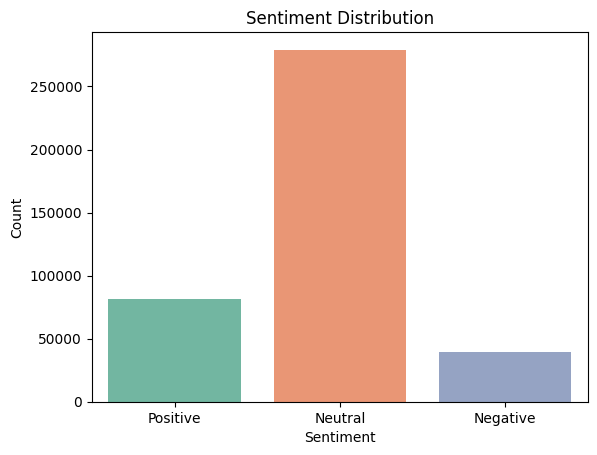

In [9]:
# 📊  Sentiment Distribution Chart
# -----------------------
sns.countplot(x=sentiment_results, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-12-2134527206.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_freqs, y=entity_names, palette="viridis")


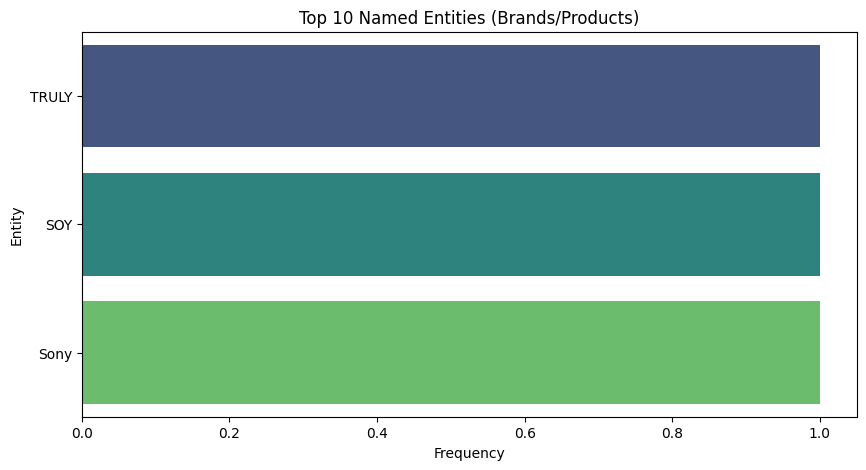

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:


# 1. Bar Chart of Top Named Entities (Brands/Products)

from collections import Counter

# Flatten list of all entity texts
all_entities = [ent[0] for sublist in ner_results for ent in sublist]
entity_counts = Counter(all_entities).most_common(10)

# Plot
entity_names = [item[0] for item in entity_counts]
entity_freqs = [item[1] for item in entity_counts]

plt.figure(figsize=(10, 5))
sns.barplot(x=entity_freqs, y=entity_names, palette="viridis")
plt.title("Top 10 Named Entities (Brands/Products)")
plt.xlabel("Frequency")
plt.ylabel("Entity")


plt.savefig("top_entities.png", bbox_inches='tight')
plt.show()
files.download("top_entities.png")


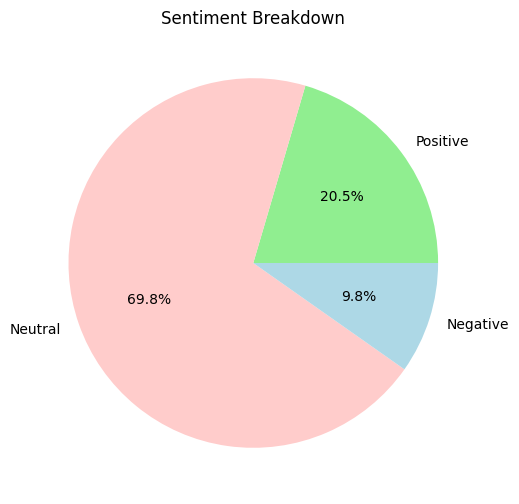

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# ===== 2. Pie Chart: Sentiment Breakdown =====
sentiment_count = Counter(sentiment_results)
plt.figure(figsize=(6, 6))
plt.pie(sentiment_count.values(), labels=sentiment_count.keys(), autopct='%1.1f%%', colors=["#90ee90", "#ffcccb", "#add8e6"])
plt.title("Sentiment Breakdown")
plt.savefig("sentiment_pie.png", bbox_inches='tight')
plt.show()
files.download("sentiment_pie.png")

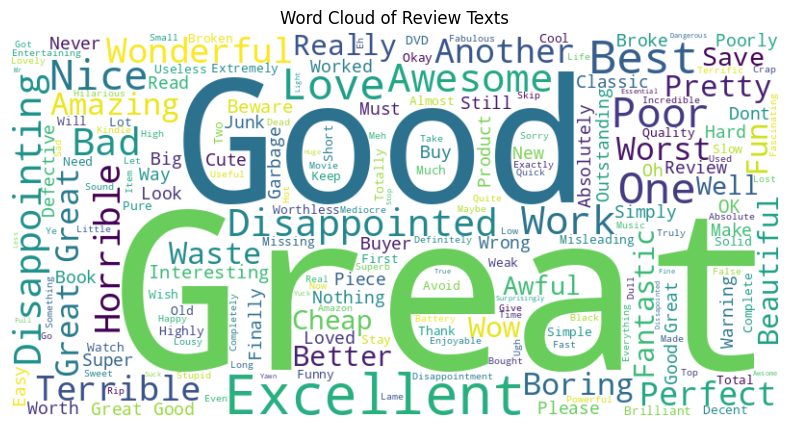

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# ===== 3. Word Cloud =====
# ===== 3. Word Cloud =====
# Import WordCloud
from wordcloud import WordCloud

# Ensure sample_reviews is available or use df['review_text'].dropna().astype(str).tolist()
# assuming df is still in scope and contains the 'review_text' column.
# If you want to use all reviews (not just the sample), use the line below:
all_text = ' '.join(df['review_text'].dropna().astype(str).tolist())

# If you specifically want to use the sample reviews defined earlier:
# all_text = ' '.join(sample_reviews)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Review Texts")
plt.savefig("wordcloud.png", bbox_inches='tight')
plt.show()
files.download("wordcloud.png")